In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Flight Price Prediction Model Training

### EDA

In [3]:
data = pd.read_csv('Clean_Dataset.csv')
df = data.sample(n=100000, random_state=42)
df.head()

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
27131,27131,Air_India,AI-506,Delhi,Morning,one,Early_Morning,Kolkata,Economy,19.75,40,7366
266857,266857,Vistara,UK-706,Kolkata,Morning,one,Night,Mumbai,Business,9.83,42,64831
141228,141228,Vistara,UK-772,Kolkata,Morning,one,Night,Bangalore,Economy,10.50,41,6195
288329,288329,Vistara,UK-824,Chennai,Night,one,Morning,Delhi,Business,14.50,14,60160
97334,97334,Air_India,AI-501,Bangalore,Afternoon,one,Night,Mumbai,Economy,8.25,20,6578


In [4]:
df.describe()

,Unnamed: 0,duration,days_left,price
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,150257.495090,12.252241,25.934920,20924.723170
std,86634.998207,7.196278,13.546956,22715.417063
min,0.000000,0.830000,1.000000,1105.000000
25%,75214.750000,6.830000,14.000000,4789.000000
50%,150478.500000,11.250000,26.000000,7425.000000
75%,225319.250000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,115211.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100000 entries, 27131 to 77708
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        100000 non-null  int64  
 1   airline           100000 non-null  object 
 2   flight            100000 non-null  object 
 3   source_city       100000 non-null  object 
 4   departure_time    100000 non-null  object 
 5   stops             100000 non-null  object 
 6   arrival_time      100000 non-null  object 
 7   destination_city  100000 non-null  object 
 8   class             100000 non-null  object 
 9   duration          100000 non-null  float64
 10  days_left         100000 non-null  int64  
 11  price             100000 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 9.9+ MB


In [5]:
print(df['airline'].unique())
print(df['source_city'].unique())
print(df['departure_time'].unique())
print(df['stops'].unique())
print(df['arrival_time'].unique())
print(df['destination_city'].unique())
print(df['class'].unique())

['Air_India' 'Vistara' 'AirAsia' 'Indigo' 'SpiceJet' 'GO_FIRST']
['Delhi' 'Kolkata' 'Chennai' 'Bangalore' 'Mumbai' 'Hyderabad']
['Morning' 'Night' 'Afternoon' 'Early_Morning' 'Evening' 'Late_Night']
['one' 'zero' 'two_or_more']
['Early_Morning' 'Night' 'Morning' 'Afternoon' 'Evening' 'Late_Night']
['Kolkata' 'Mumbai' 'Bangalore' 'Delhi' 'Chennai' 'Hyderabad']
['Economy' 'Business']


Checking for missing values

In [6]:
df.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

Distribution of price based on airlines

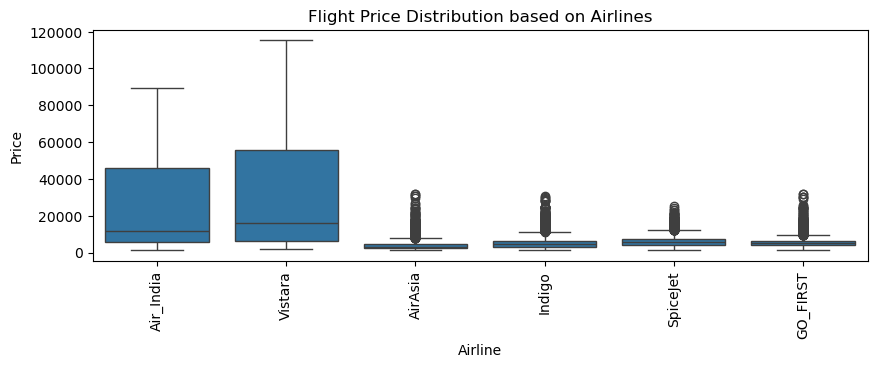

In [7]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='airline', y='price', data=df)
plt.title('Flight Price Distribution based on Airlines')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

Price distribution based on source and destination cities

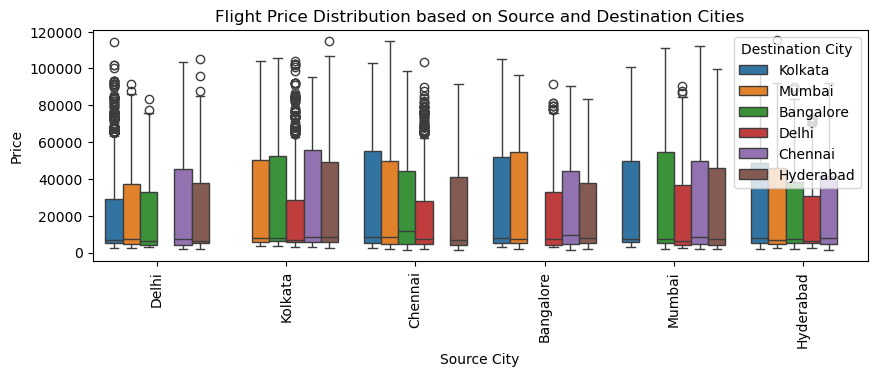

In [8]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='source_city', y='price', data=df, hue='destination_city')
plt.title('Flight Price Distribution based on Source and Destination Cities')
plt.xlabel('Source City')
plt.ylabel('Price')
plt.legend(title='Destination City')
plt.xticks(rotation=90)
plt.show()

Price distribution based on arrival and departure times

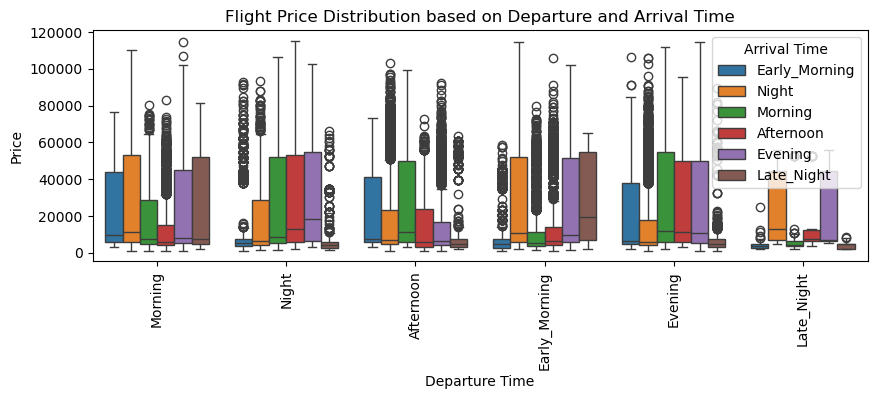

In [9]:
plt.figure(figsize=(10, 3))
sns.boxplot(x='departure_time', y='price', data=df, hue='arrival_time')
plt.title('Flight Price Distribution based on Departure and Arrival Time')
plt.xlabel('Departure Time')
plt.ylabel('Price')
plt.legend(title='Arrival Time')
plt.xticks(rotation=90)
plt.show()

Price distribution based on how many days before the flight the ticket was booked

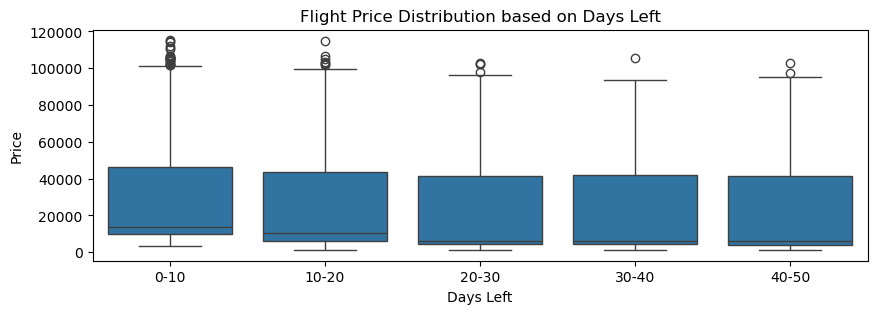

In [10]:
bins = [0, 10, 20, 30, 40, 50]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50']
plt.figure(figsize=(10, 3))
sns.boxplot(x=pd.cut(df['days_left'], bins=bins, labels=labels, right=False), y=df['price'])
plt.title('Flight Price Distribution based on Days Left')
plt.xlabel('Days Left')
plt.ylabel('Price')
plt.show()

Dropping the flight number column

In [12]:
df.drop(df.columns[0], axis=1, inplace=True)
df.drop('flight', axis=1, inplace=True)

Distribution of numerical features

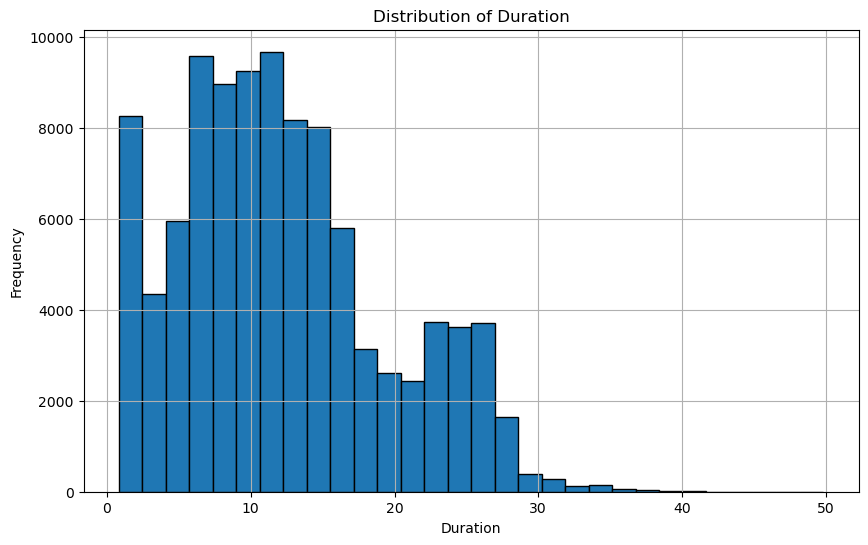

In [12]:
plt.figure(figsize=(10, 6))
df['duration'].hist(bins=30, edgecolor='black')  # Adjust 'bins' as needed
plt.title('Distribution of Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')
plt.show()

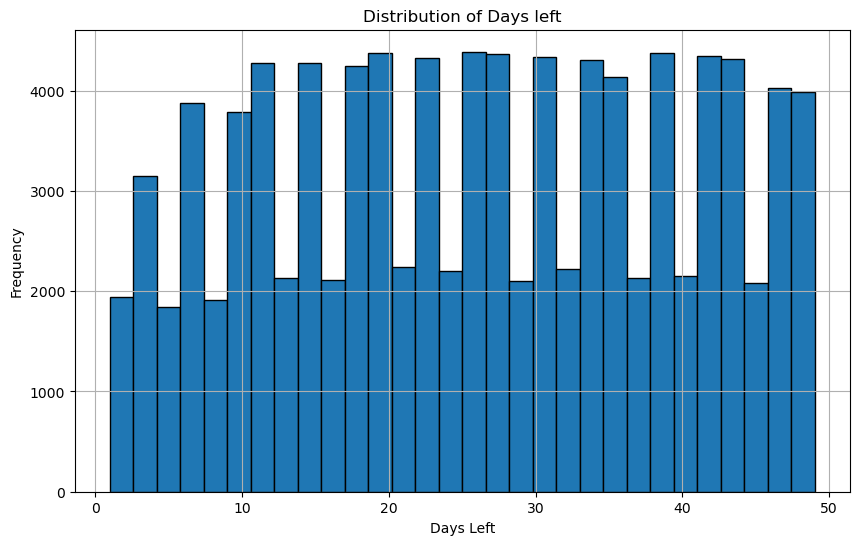

In [ ]:
plt.figure(figsize=(10, 6))
df['days_left'].hist(bins=30, edgecolor='black')
plt.title('Distribution of Days left')
plt.xlabel('Days Left')
plt.ylabel('Frequency')
plt.show()

Correlation matrix to show that the numerical features are not overly dependant on each other

<module 'matplotlib.pyplot' from 'c:\\Users\\ishan\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

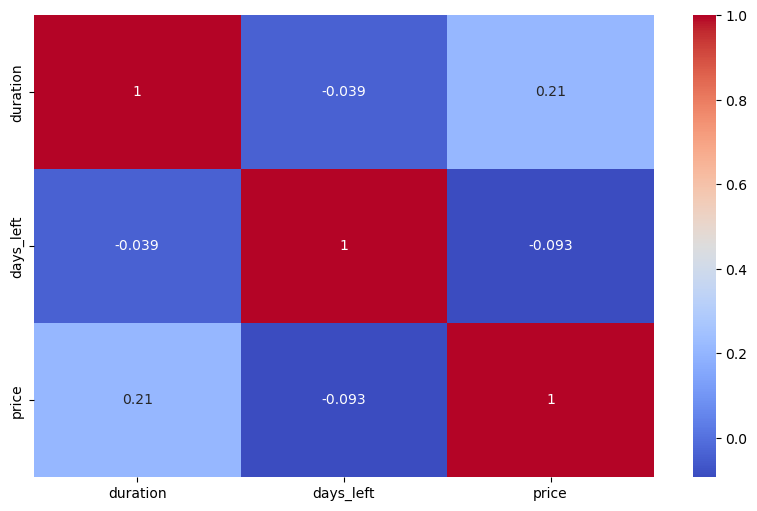

In [14]:
corr_matrix = df[df.select_dtypes(include=['int64', 'float64']).columns].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt

## Data Preprocessing

In [13]:
num_vars = df.select_dtypes(include=['number']).columns 
cat_vars = df.select_dtypes(exclude=['number']).columns
num_vars = num_vars.delete(2)

Removing the outliers based on the iqr method

In [16]:
def remove_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    initial_count = df.shape[0]
    df.drop(df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)].index, inplace=True)
    removed_count = initial_count - df.shape[0]
    print(f'Outliers removed: {removed_count}')

In [17]:
remove_outliers(df, 'duration')
remove_outliers(df, 'days_left')

Outliers removed: 699
Outliers removed: 0


As most of the features are categorical, using the chi square test to check for multicolinearity between them

In [18]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder

In [19]:
label_encoders = {}
df_encoded = df.copy()
for col in cat_vars:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [20]:
x_categ = df_encoded[cat_vars]
y = df_encoded['price']
chi_scores, p_values = chi2(x_categ, y)
chi_results = pd.DataFrame({'Feature': x_categ.columns, 'Chi-Square Score': chi_scores, 'P-Value': p_values})

In [21]:
chi_results

,Feature,Chi-Square Score,P-Value
0,airline,83408.584076,0.0
1,source_city,108527.349911,0.0
2,departure_time,28941.692477,0.0
3,stops,121468.703174,0.0
4,arrival_time,26845.204809,0.0
5,destination_city,100648.205549,0.0
6,class,31136.079848,0.0


As the number of observations is high, doing further test with Cramer's V method

In [22]:
import scipy.stats as stats
def cramers_v(x, y):
  confusion_matrix = pd.crosstab(x, y)
  chi2 = stats.chi2_contingency(confusion_matrix)[0]
  n = confusion_matrix.sum().sum()
  return np.sqrt(chi2/(n*(min(confusion_matrix.shape)-1)))

In [24]:
corr_matrix = pd.DataFrame(index=cat_vars, columns=cat_vars)
for f1 in cat_vars:
  for f2 in cat_vars:
    if f1!=f2:
      corr_matrix.loc[f1, f2] = cramers_v(df[f1], df[f2])
    else:
      corr_matrix.loc[f1, f2] = 1

In [25]:
corr_matrix

,airline,source_city,departure_time,stops,arrival_time,destination_city,class
airline,1,0.063361,0.083765,0.177105,0.138886,0.065338,0.454046
source_city,0.063361,1,0.086899,0.06315,0.049785,0.206613,0.029666
departure_time,0.083765,0.086899,1,0.071477,0.147074,0.032867,0.073933
stops,0.177105,0.06315,0.071477,1,0.066149,0.098265,0.132389
arrival_time,0.138886,0.049785,0.147074,0.066149,1,0.119671,0.105504
destination_city,0.065338,0.206613,0.032867,0.098265,0.119671,1,0.032191
class,0.454046,0.029666,0.073933,0.132389,0.105504,0.032191,1


In [26]:
threshold = 0.5
features_to_remove = set()
for col in corr_matrix.columns:
  high_corr_features = corr_matrix[col][corr_matrix[col] > threshold].index.tolist()
  high_corr_features.remove(col)
  for feature in high_corr_features:
    if feature not in features_to_remove:
      features_to_remove.add(feature)

In [27]:
features_to_remove

set()

Scaling the numercal features and one hot encoding the categorical features

In [7]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [8]:
import pickle 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [14]:
x = df.drop('price', axis=1)
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
x_train

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left
189701,Indigo,Chennai,Morning,one,Night,Mumbai,Economy,8.92,19
133705,AirAsia,Kolkata,Morning,two_or_more,Night,Mumbai,Economy,13.17,39
144866,AirAsia,Kolkata,Evening,two_or_more,Morning,Hyderabad,Economy,13.00,23
139364,GO_FIRST,Kolkata,Evening,one,Late_Night,Bangalore,Economy,8.17,28
133514,Air_India,Kolkata,Afternoon,one,Evening,Mumbai,Economy,4.83,38
...,...,...,...,...,...,...,...,...,...
127252,Air_India,Kolkata,Early_Morning,one,Night,Delhi,Economy,16.17,48
297152,Vistara,Chennai,Morning,one,Morning,Kolkata,Business,23.92,29
93937,GO_FIRST,Bangalore,Night,one,Morning,Delhi,Economy,11.83,49
102710,Vistara,Bangalore,Early_Morning,one,Evening,Mumbai,Economy,12.08,49


In [10]:
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_vars),
    ('scaler', StandardScaler(), num_vars)
])

In [45]:
x_train_final = preprocessor.fit_transform(x_train)
x_test_final = preprocessor.transform(x_test)

Saving the preprocessor as a pkl file

In [47]:
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

Using xgboost to train the model

In [49]:
pip install xgboost

  Using cached xgboost-3.0.0-py3-none-win_amd64.whl.metadata (2.1 kB)
Using cached xgboost-3.0.0-py3-none-win_amd64.whl (150.0 MB)
Note: you may need to restart the kernel to use updated packages.


In [50]:
import xgboost as xgb

Hyperparamter tuning using RandomizedSearchCV

In [51]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
param_dist = {
    'n_estimators': [100, 300, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [54]:
random_search = RandomizedSearchCV(xgb_model, param_distributions=param_dist, n_iter=10, scoring='neg_mean_absolute_error', cv=3, verbose=1, n_jobs=14)
random_search.fit(x_train_final, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          feature_weights=None, gamma=None,
                                          grow_policy=None,
                                          importance_type=None,
                                          interaction_constraint...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None, ...),
                   n_jobs=14,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 0.9],
                                        'learning_rate': [0.01, 0.05, 0.1],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [100, 300, 500],
                                        'subsample': [0.7, 0.8, 0.9]},
                   scoring='neg_mean_absolute_error', verbose=1)

In [55]:
from sklearn.metrics import r2_score
best_model = random_search.best_estimator_ 
y_pred = best_model.predict(x_test_final)
print(r2_score(y_test, y_pred))

0.9793293676679702


Saving the model as pkl file

In [56]:
with open('xgb_model.pkl', 'wb') as f:
    pickle.dump(random_search.best_estimator_, f)